In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE =32
CHANELS = 3


In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\hp\Desktop\Potatoleves\PlantVillage",
    shuffle =True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [115]:
class_name=dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

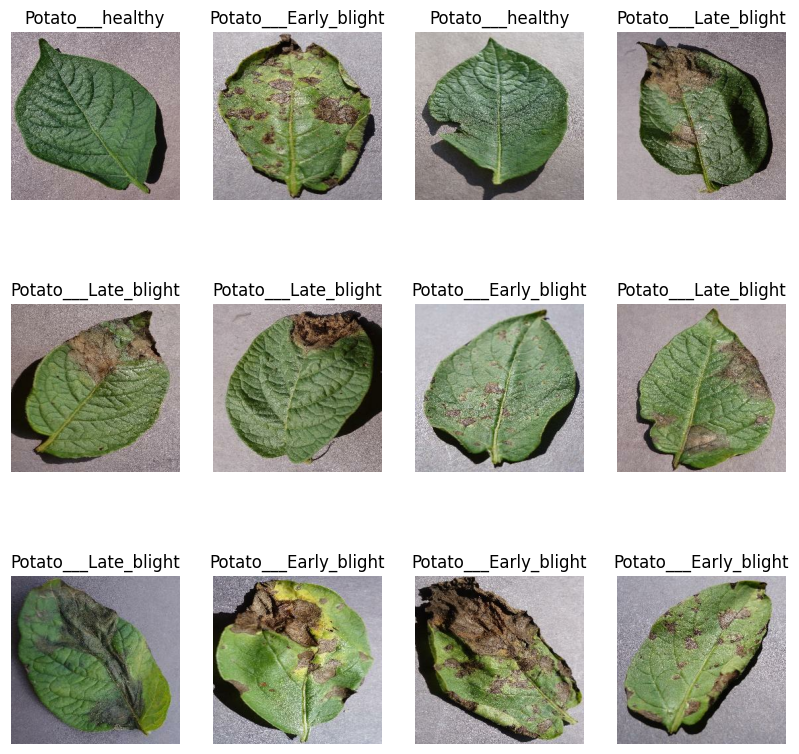

In [6]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")


In [7]:
len(dataset)

68

In [45]:
80% ==> training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (829920516.py, line 1)

In [15]:
train_size =0.8
len(dataset)*train_size

54.400000000000006

In [17]:
train_ds = dataset.take(54)
len(train_ds)


54

In [19]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [21]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [23]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [25]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size = len(ds)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds
    

In [27]:
train_ds,val_ds,test_ds =get_dataset_partitions_tf(dataset)

In [29]:
len(train_ds)

54

In [31]:
len(val_ds)

6

In [33]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [35]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])


In [39]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),  # flips horizontally & vertically
    tf.keras.layers.RandomRotation(0.2),                   # rotates ±20% of 2π radians
])


In [71]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),   # ✅ Correct way to resize
    layers.Rescaling(1./255)                   # ✅ Normalize pixels to [0,1]
])


In [75]:
import tensorflow as tf
from tensorflow.keras import layers

IMAGE_SIZE = 256  # example
CHANELS = 3

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # ✅ Resizing layer
    layers.Rescaling(1./255)                  # ✅ Normalize to [0,1]
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])


In [77]:
from tensorflow.keras import models, layers

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANELS)
n_classes = 3

model = models.Sequential([
    layers.Input(shape=input_shape),
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax')
])

model.summary()


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_16 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_17 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,259 (56.61 MB)

 Trainable params: 14,839,811 (56.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [79]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [85]:
EPOCHS = 50 # or any number you prefer


In [87]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    verbose=1,
    validation_data=val_ds
)


Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - accuracy: 0.8119 - loss: 7.5054 - val_accuracy: 0.4792 - val_loss: 368.8835
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - accuracy: 0.8420 - loss: 0.8357 - val_accuracy: 0.4792 - val_loss: 514.2861
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.8617 - loss: 0.4791 - val_accuracy: 0.4792 - val_loss: 501.8781
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.8698 - loss: 0.5488 - val_accuracy: 0.4792 - val_loss: 362.0672
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.8652 - loss: 0.4765 - val_accuracy: 0.4792 - val_loss: 336.1591
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.8762 - loss: 0.4338 - val_accuracy: 0.4792 - val_loss: 210.6332
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.8981 - loss: 0.3300 - val_accuracy: 0.4792 - val_loss: 191.4860
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.8912 - loss: 0.3485 - val_accura

In [88]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 343ms/step - accuracy: 0.6853 - loss: 2.8050


In [91]:
scores

[2.804999828338623, 0.6853448152542114]

In [93]:
history

In [95]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [97]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [99]:
history.history['accuracy']

[0.8119212985038757,
 0.8420138955116272,
 0.8616898059844971,
 0.8697916865348816,
 0.8651620149612427,
 0.8761574029922485,
 0.8981481194496155,
 0.8912037014961243,
 0.8935185074806213,
 0.8842592835426331,
 0.8935185074806213,
 0.8877314925193787,
 0.8888888955116272,
 0.9068287014961243,
 0.8709490895271301,
 0.8935185074806213,
 0.8894675970077515,
 0.8946759104728699,
 0.9085648059844971,
 0.9097222089767456,
 0.9322916865348816,
 0.9143518805503845,
 0.9074074029922485,
 0.9276620149612427,
 0.9276620149612427,
 0.9189814925193787,
 0.9328703880310059,
 0.9085648059844971,
 0.9346064925193787,
 0.9299768805503845,
 0.9346064925193787,
 0.9340277910232544,
 0.9288194179534912,
 0.9236111044883728,
 0.9282407164573669,
 0.9427083134651184,
 0.9311342835426331,
 0.9293981194496155,
 0.9166666865348816,
 0.9201388955116272,
 0.9432870149612427,
 0.9288194179534912,
 0.9253472089767456,
 0.9259259104728699,
 0.9392361044883728,
 0.9450231194496155,
 0.9415509104728699,
 0.9380787014

In [101]:
acc=history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss = history.history['val_loss']


Text(0.5, 1.0, 'Traning and validation Accuracy')

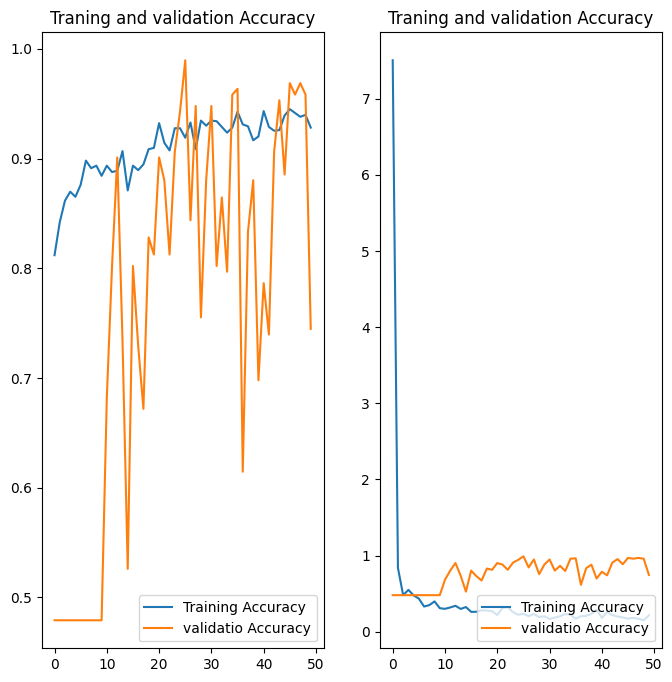

In [105]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='validatio Accuracy')
plt.legend(loc='lower right')
plt.title('Traning and validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='validatio Accuracy')
plt.legend(loc='lower right')
plt.title('Traning and validation Accuracy')

first image to predict
fist image s actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
predicted label: Potato___Early_blight


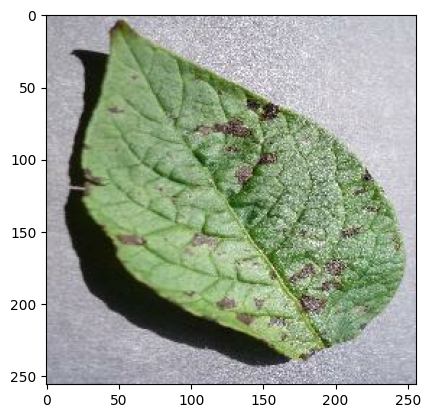

In [127]:
for images_batch,labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("fist image s actual label:",class_name[first_label])

    batch_prediction=model.predict(images_batch)
    print("predicted label:", class_name[np.argmax(batch_prediction[0])])

    

In [139]:
def predict(model, img):
    # Convert image to array and add batch dimension
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


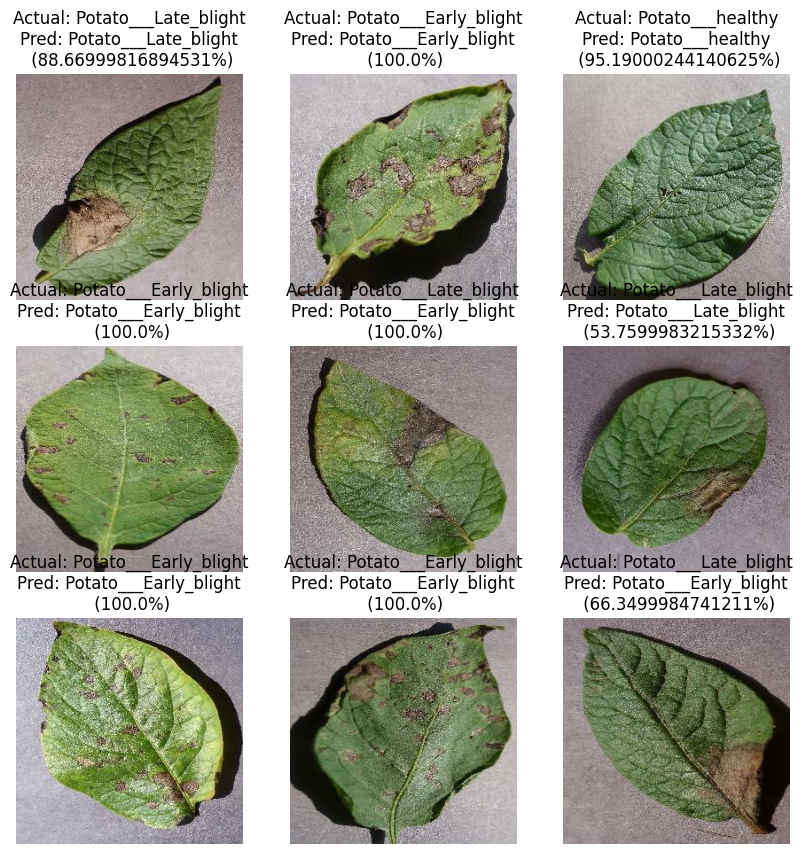

In [147]:
for images, labels in test_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class}\nPred: {predicted_class}\n ({confidence}%)")
        plt.axis("off")
    plt.show()

In [153]:
import os

model_version = 1
save_dir = "../models"

os.makedirs(save_dir, exist_ok=True)

model.save(f"{save_dir}/{model_version}.keras")
print("Model saved successfully!")


#model veesion wenas kara apita version wena wenma save kara gnan puluwna

Model saved successfully!
